In [1]:
try:
    from algo_helper import * 
except: # try to fetch utils functions from URL
    import urllib.request as request; exec(request.urlopen('https://perso.esiee.fr/~perretb/AlgorithmDesign/algo_helper.py').read(), globals())

# Algorithm Design
## Chapter 2 - Data structures

### Unique elements in a list

**Implement `unique` in the following function.**

You can use the `sort` function, you cannot use a `dictionary` or a `set`.

The unit test must says that your function seems correct.

In [2]:
def unique(a):
	if len(a) == 0:
		return a
	a = sorted(a)
	u = [a[0]]
	for i in range(1, len(a)):
			if a[i] != a[i-1]:
				u.append(a[i])
	return u

test_unique(unique);

--- Running test: 
✔  unique([]) -> []
✔  unique([0, 0, 0, 0]) -> [0]
✔  unique([4, 3, 22, 3, 11, 4, -1, 3, -1]) -> [-1, 3, 4, 11, 22]
✔  unique([3, 6, 6, 2, 1, 2, 6, 1, 1, 5]) -> [1, 2, 3, 5, 6]
✔  unique([2, 2, 7, 0, 4, 5, 4, 2, 8, 6]) -> [0, 2, 4, 5, 6, 7, 8]
✔  unique([1, 3, 7, 9, 9, 1, 4, 8, 1, 6]) -> [1, 3, 4, 6, 7, 8, 9]
✔  unique([2, 5, 2, 8, 5, 9, 0, 2, 0, 0]) -> [0, 2, 5, 8, 9]
✔  unique([3, 2, 7, 4, 7, 2, 9, 3, 4, 2]) -> [2, 3, 4, 7, 9]
✔ 8/8 tests passed.
--- Test finished.


**Give the worst-case runtime complexity of your algorithm.**

$O(n*log(n))$ for sorting.

### Intersection of two lists

**Implement `inter` in the following function.**

You can use the `sort` function, you cannot use a `dictionary` or a `set`.

The unit test must says that your function seems correct.

In [1]:
def inter(a, b):
	a = sorted(a)
	b = sorted(b)
	i, j = 0, 0
	intersection = []
	last_inserted = None
	while True:
		if i == len(a) or j == len(b):
			break
		if a[i] == b[j]:
			if a[i] != last_inserted:
				intersection.append(a[i])
				last_inserted = a[i]
			i += 1
			j += 1
		elif a[i] < b[j]:
			i += 1
		elif b[j] < a[i]:
			j += 1
	return intersection

test_inter(inter)

NameError: name 'test_inter' is not defined

### Reverse Polish Notation

**Implement `reverse_polish_evaluation` in the following function.**

The input is a string containing integers and symbols + and * encoding a mathematical expression in reverse Polish notation and the function returns the value of the expression.
 
The unit test must says that your function seems correct.

In [4]:
def reverse_polish_evaluation(s):
	tokens = s.split()
	stack = []
	for t in tokens:
		if t == '+':
			n1 = stack.pop()
			n2 = stack.pop()
			stack.append(n1 + n2)
		elif t == '*':
			n1 = stack.pop()
			n2 = stack.pop()
			stack.append(n1 * n2)
		else:
			stack.append(int(t))
	return stack.pop()

test_reverse_polish_evaluation(reverse_polish_evaluation);   


--- Running test: 
✔  reverse_polish_evaluation(3 2 + 4 *) -> 20
✔  reverse_polish_evaluation(3 2 4 * +) -> 11
✔  reverse_polish_evaluation(3 2 4 + *) -> 18
✔  reverse_polish_evaluation(3 2 4 + * 2 +) -> 20
✔  reverse_polish_evaluation(3 2 4 + 2 * +) -> 15
✔ 5/5 tests passed.
--- Test finished.


### Syntax Error

**Implement `is_balanced` in the following function.**

The class `List` in Python provides effectively implements a stack with the following interface:

* `s.append(e)`: push a new element on the top of the stack
* `s.pop()`: remove and return the element at the top of the stack

The unit test must says that your function seems correct.

In [5]:
def is_balanced(s):
	stack = []
	matching_pairs = {')': '(', ']': '['}

	for token in s:
		if token in matching_pairs.values():
			stack.append(token)
		elif token in matching_pairs:
			if len(stack) == 0 or stack.pop() != matching_pairs[token]:
				return False
		else:
			continue
		
	return len(stack) == 0	

test_is_balanced(is_balanced);

--- Running test: 
✔  is_balanced() -> True
✔  is_balanced(()) -> True
✔  is_balanced([]) -> True
✔  is_balanced(([)]) -> False
✔  is_balanced(([])) -> True
✔  is_balanced(([) -> False
✔  is_balanced([()[]]) -> True
✔  is_balanced()) -> False
✔ 8/8 tests passed.
--- Test finished.


### Heap sort

**Implement `heap_sort` in the following function.**

The class `bheap` is a simple wrapper around some Python utility functions to create a binary heap.
 
The unit test must says that your function seems correct.

In [6]:
class bheap:
		# simple binary heap wrapper class around python heapq class
		# to match the interface presented in the course

		def __init__(self):
				# create an empty binary heap
				self.heap = []

		def insert(self, element):
				# insert a new element in the heap
				import heapq
				heapq.heappush(self.heap, element)

		def find_min(self):
				# find the minimum element in the heap
				return self.heap[0]
		
		def find_max(self):
				# find the maximum element in the heap
				return self.heap[-1]

		def delete_min(self):
				# remove the minimum element in the heap
				import heapq
				heapq.heappop(self.heap)

		def delete_max(self):
				# remove the maximum element in the heap
				import heapq
				max_index = self.heap.index(max(self.heap))
				self.heap[max_index] = self.heap[-1]
				self.heap.pop()
				heapq.heapify(self.heap)

		def size(self):
				# number of elements in the heap
				return len(self.heap)

		
def heap_sort(array):
		heap = bheap()
		for n in array:
			heap.insert(n)
		array = []
		while heap.size() > 0:
			array.append(heap.find_min())
			heap.delete_min()
		return array	

unit_test_sort(heap_sort, inplace=False);

--- Running test: 
✔  heap_sort([0.55 0.72 0.6  0.54 0.42 0.65 0.44 0.89 0.96 0.38]) -> [0.38 0.42 0.44 0.54 0.55 0.6  0.65 0.72 0.89 0.96]
✔  heap_sort([0.22 0.48 0.1  0.42 0.22 0.58 0.92 0.43 0.15 0.74]) -> [0.1  0.15 0.22 0.22 0.42 0.43 0.48 0.58 0.74 0.92]
✔  heap_sort([0.33 0.56 0.56 0.   0.18 0.03 0.47 0.42 0.96 0.51]) -> [0.   0.03 0.18 0.33 0.42 0.47 0.51 0.56 0.56 0.96]
✔  heap_sort([0.73 0.23 0.3  0.61 0.16 0.52 0.01 0.86 0.22 0.13]) -> [0.01 0.13 0.16 0.22 0.23 0.3  0.52 0.61 0.73 0.86]
✔  heap_sort([0.53 0.19 0.79 0.19 0.47 0.75 0.24 0.78 0.12 0.82]) -> [0.12 0.19 0.19 0.24 0.47 0.53 0.75 0.78 0.79 0.82]
✔ 5/5 tests passed.
--- Test finished.


Now let's verify that the runtime of the implemented algorithm matches the expected runtime complexity.

We are going to run the implemented algorithm on three kind of inputs of various sizes:

- already sorted arrays
- reverse sorted arrays
- random arrays

**What is the best and worst case time complexity of the algorithm?**

**Does the execution runtime of the implementation matches with those theoretical runtime complexities?**

--- Running runtime test for 'heap_sort':
	 - Input is a sorted array:
		array size: 1,024 -> time 0.000 s
		array size: 2,048 -> time 0.000 s
		array size: 4,096 -> time 7.710 s
		array size: 8,192 -> time 10.194 s
		array size: 16,384 -> time 11.221 s
		array size: 32,768 -> time 28.212 s
		array size: 65,536 -> time 61.705 s
		array size: 131,072 -> time 129.345 s
	 - Input is a reverse sorted array:
		array size: 1,024 -> time 2.543 s
		array size: 2,048 -> time 0.232 s
		array size: 4,096 -> time 4.948 s
		array size: 8,192 -> time 8.707 s
		array size: 16,384 -> time 15.224 s
		array size: 32,768 -> time 31.648 s
		array size: 65,536 -> time 62.576 s
		array size: 131,072 -> time 135.986 s
	 - Input is a random array:
		array size: 1,024 -> time 5.208 s
		array size: 2,048 -> time 0.000 s
		array size: 4,096 -> time 5.208 s
		array size: 8,192 -> time 5.338 s
		array size: 16,384 -> time 15.628 s
		array size: 32,768 -> time 26.184 s
		array size: 65,536 -> time 83.615 s
		array 

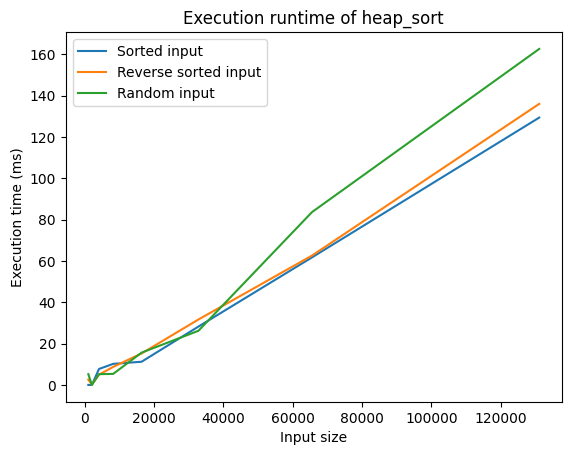

In [7]:
runtime_test_sort(heap_sort, [2**i for i in range(10, 18)])

## Finding the k Smallest Elements in an Array

In this section, we will implement a function to find the k smallest elements in an array using a custom binary heap class. The binary heap will be used to maintain a max-heap of the k smallest elements encountered so far. By the end of the process, we will extract and return the k smallest elements in sorted order.

### Steps:
1. **Define the `bheap` Class**: This class will simulate a max-heap using Python's `heapq` module by inserting negative values.
2. **Insert Elements**: Insert the first k elements of the array into the heap.
3. **Maintain k Smallest Elements**: For each subsequent element in the array, if it is smaller than the maximum element in the heap, replace the maximum element with the current element.
4. **Extract k Smallest Elements**: Extract the minimum elements from the heap and sort them to get the k smallest elements in order.


In [8]:
import heapq

class bheap:
		"""
		Binary Heap implementation.
		Methods:
		- insert(val): Inserts a value into the heap.
		- find_max(): Returns the maximum value in the heap.
		- delete_max(): Deletes the maximum value from the heap.
		- find_min(): Returns the minimum value in the heap.
		- size(): Returns the size of the heap.
		"""
		def __init__(self):
				self.heap = []

		def insert(self, val):
				heapq.heappush(self.heap, -val)  # Use negative values to simulate a max-heap

		def find_max(self):
				return -self.heap[0]  # Return the negative of the max value

		def delete_max(self):
				heapq.heappop(self.heap)  # Pop the max value (negative)

		def find_min(self):
				return -heapq.heappop(self.heap)  # Pop and return the min value (negative)

		def size(self):
				return len(self.heap)

def get_k_min_elements(array, k):
		"""
		Returns the k minimum elements from the given array.
		Parameters:
		array (list): The input array.
		k (int): The number of minimum elements to return.
		Returns:
		list: The k minimum elements from the array.
		"""
		heap = bheap()
		for i in range(k):
				heap.insert(array[i])
		for i in range(k, len(array)):
				if array[i] <= heap.find_max():
						heap.delete_max()
						heap.insert(array[i])
		k_min = []
		while heap.size() > 0:
				k_min.append(heap.find_min())
		return k_min

test_array = [5, 7, 9, 1, 4, 2, 0, 9, 3]
print(get_k_min_elements(test_array, 4))

[3, 2, 1, 0]


### Dynamic array insertion

**Implement the two functions `new_size` and `insert_back` of the class `dynamic_array` and compare the runtime of the two strategies.**

The unit test must says that your function seems correct.

In [9]:
import numpy as np

class dynamic_array:
    def __init__(self, strategy):
        """
        Create an empty dynamic array. 
        The allocation strategy can either be "linear" or "geometric"
        """
        self.array = np.array([0], dtype=np.int64)
        self.num_elements = 0
        self.strategy = strategy

    def at(self, k):
        """
        Return the k-th element
        """
        return self.array[k]

    def size(self):
        """
        Return the number of elements
        """
        return self.num_elements

    def capacity(self):
        """
        Return the capacity of the storage array
        """
        return len(self.array)

    def increase_size(self):
        """
        Increases the size of the storage array
        """
        new_size = self.new_size()
        new_array = np.empty((new_size,), dtype=np.int64)
        new_array[:len(self.array)] = self.array[:]
        self.array = new_array

    def new_size(self):
        """
        When we increase the size of the storage array: returns the size of the new storage:
        If self.strategy is equal to "linear" the new size is len(self.array) + 5.
        If self.strategy is equal to "geometric" the new size is len(self.array) * 2.
        """
        if self.strategy == "linear":
            return self.capacity() + 5
        else:
            return self.capacity() * 2

    def insert_back(self, e):
        """
        Insert an element at the back of the array, resizing if necessary
        """
        if self.size() == self.capacity():
            self.increase_size()
        self.array[self.num_elements] = e
        self.num_elements += 1

# Example usage
unit_test_dynamic_array(dynamic_array)

--- Running test: Strategy: linear
✔ 3000/3000 tests passed.
--- Test finished.
--- Running test: Strategy: geometric
✔ 3000/3000 tests passed.
--- Test finished.


Now let's verify that the runtime of the implemented algorithm matches the expected runtime complexity.

Recall what is the expected amortized runtime complexity on $n$ operations `insert_back` on a dynamic array with the resizing strategy:

- linear?
- geometric?

**Does the execution runtime of the implementation matches with those theoretical runtime complexities?**

Dynamic array 
	Linear allocation
		 1000 -> 0.0010004043579101562
		 4000 -> 0.0
		 7000 -> 0.0010314328329903738
		 10000 -> 0.0007994651794433594
		 13000 -> 0.0011547345381516677
		 16000 -> 0.0009764432907104493
		 19000 -> 0.0008229079999421772
		 22000 -> 0.0014204003594138405
		 25000 -> 0.0012503910064697264
		 28000 -> 0.0011166930198669434
		 31000 -> 0.001512396720147902
		 34000 -> 0.0013901626362520106
		 37000 -> 0.001549289033219621
		 40000 -> 0.0015725433826446532
		 43000 -> 0.0018331283746763718
		 46000 -> 0.0017070355622664742
		 49000 -> 0.0020463320673728474
		 52000 -> 0.002094589746915377
		 55000 -> 0.0020695859735662286
		 58000 -> 0.0021692226672994676
		 61000 -> 0.0022755489974725443
		 64000 -> 0.0022446773946285248
		 67000 -> 0.002405518916115832
		 70000 -> 0.0024612358638218474
	Geometric allocation
		 1000 -> 0.0
		 4000 -> 0.0
		 7000 -> 0.0
		 10000 -> 0.0
		 13000 -> 0.0
		 16000 -> 0.0
		 19000 -> 0.0
		 22000 -> 0.0
		 25000 -> 0.0
		 28000 -> 

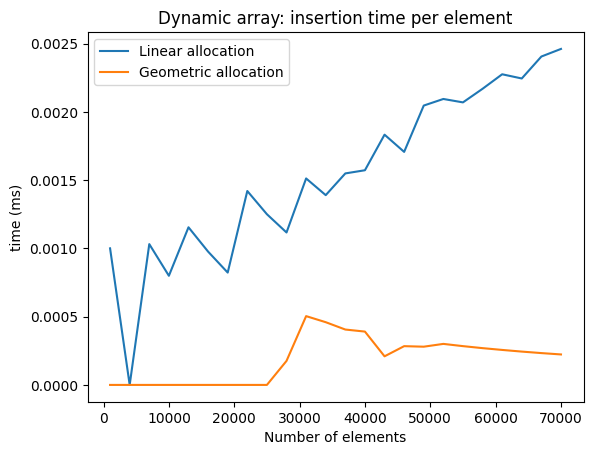

In [10]:
plot_dynamic_array_runtime(dynamic_array)

### Dequeue based on dynamic arrays

**Implement the functions  of the class `dequeuea` below.**

The unit test must says that your function seems correct.

In [11]:
import numpy as np


class dequeuea:
    # A dequeue based on a dynamic array

    def __init__(self):
        # create an empty binary heap
        self.array = np.zeros(1, dtype=np.int64)
        self.num_elements = 0
        self.front = 0
        self.back = 0

    def size(self):
        # return the number of elements in the queue
        return self.num_elements

    def peek_front(self):
        # return the element at the front of the queue
        if self.num_elements == 0:
            raise IndexError("peek from an empty dequeue")
        return self.array[self.front]

    def peek_back(self):
        # return the element at the back of the queue
        if self.num_elements == 0:
            raise IndexError("peek from an empty dequeue")
        return self.array[self.back - 1]

    def _increase_array_size(self):
        # increase the size of the array with a growth factor of 2
        # copy the old array in the middle of the new one
        new_size = len(self.array) * 2
        new_array = np.zeros(new_size, dtype=np.int64)
        start = (new_size - self.num_elements) // 2
        for i in range(self.num_elements):
            new_array[start + i] = self.array[(self.front + i) % len(self.array)]
        self.array = new_array
        self.front = start
        self.back = start + self.num_elements

    def insert_front(self, ne):
        # insert a new element at the front of the queue
        if self.num_elements == len(self.array):
            self._increase_array_size()
        self.front = (self.front - 1) % len(self.array)
        self.array[self.front] = ne
        self.num_elements += 1

    def insert_back(self, ne):
        # insert a new element at the back of the queue
        if self.num_elements == len(self.array):
            self._increase_array_size()
        self.array[self.back] = ne
        self.back = (self.back + 1) % len(self.array)
        self.num_elements += 1

    def remove_front(self):
        # remove the element at the front of the queue
        if self.num_elements == 0:
            raise IndexError("remove from an empty dequeue")
        front_element = self.array[self.front]
        self.front = (self.front + 1) % len(self.array)
        self.num_elements -= 1
        return front_element

    def remove_back(self):
        # remove the element at the back of the queue
        if self.num_elements == 0:
            raise IndexError("remove from an empty dequeue")
        self.back = (self.back - 1) % len(self.array)
        back_element = self.array[self.back]
        self.num_elements -= 1
        return back_element

test_dequeue(dequeuea);

--- Running test: 
✔ 14/14 tests passed.
--- Test finished.


The following execution example can help you debug your code

In [12]:

def print_info(dq):
    if dq.size() > 0:
        print("Dequeue: size:", dq.size(), "front", dq.peek_front(), "back",
              dq.peek_back())
    else:
        print("Dequeue: size:", dq.size())


dq = dequeuea()

print("insert front 1")
dq.insert_front(1)
print_info(dq)
print("insert back 2")
dq.insert_back(2)
print_info(dq)
print("remove back")
dq.remove_back()
print_info(dq)
print("remove back")
dq.remove_back()
print_info(dq)

print("insert front 0, 1, 2, 3, 4, 5")
print("insert back 6, 7")
for i in range(6):
    dq.insert_front(i)
for i in range(6, 8):
    dq.insert_back(i)
print_info(dq)

insert front 1
Dequeue: size: 1 front 1 back 1
insert back 2
Dequeue: size: 2 front 1 back 2
remove back
Dequeue: size: 1 front 1 back 1
remove back
Dequeue: size: 0
insert front 0, 1, 2, 3, 4, 5
insert back 6, 7
Dequeue: size: 8 front 5 back 7


### Reverse singly linked list

**Implement the functions `reverse_list` below.**

The unit test must says that your function seems correct.

In [13]:
class SinglyLinkedListNode:
    def __init__(self, value, next=None):
        self.value = value
        self.next = next

    def __str__(self):
        s = "(" 
        n = self
        while n != None:
            s += str(n.value)
            if n.next != None:
                s += " -> "
            n = n.next

        s += ")"
        return s



def reverse_list(sl_list):
    # function that reverse a singly linked list
    # sl_list: head of the singly linked list (type SinglyLinkedListNode)
    # return: head node of the reversed list

    ####################
    ## Your code here ##
    ####################
    pass


test_reverse_single_linked_list(reverse_list, SinglyLinkedListNode);

--- Running test: 
✗  reverse_list((0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8)) -> None (expected: (8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 1 -> 0))
✗ 0/1 tests passed.
--- Test finished.


The following execution example can help you debug your code

In [14]:
n = None
for i in range(8, -1, -1):
    n = SinglyLinkedListNode(i, n)

print("Original list:", str(n))

nl = reverse_list(n)
print("Reversed: ", str(nl))

Original list: (0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8)
Reversed:  None
